# 공공데이터 상권정보 분석해 보기

## 필요한 라이브러리 불러오기

In [1]:
import pandas as pd # 엑셀과 유사한 라이브러리
import numpy as np # 수치계산
import seaborn as sns # 시각화

from jupyterthemes import jtplot # 다크모드로 인한 plot 글자색 수정
jtplot.style()
jtplot.style(theme='monokai')

## 시각화를 위한 폰트 설정

In [2]:
# ctrl(cmd) + /
import matplotlib.pyplot as plt # 폰트설정
# Window의 한글 폰트 설정
plt.rc('font', family='Malgun Gothic') # 맑은 고딕
plt.rc('axes', unicode_minus=False) # 한글폰트 깨짐 방지

# 그래프가 노트북 안에 보이게 하기 위해
%matplotlib inline

In [3]:
from IPython.display import set_matplotlib_formats
# 폰트가 선명하게 보이기 위해
set_matplotlib_formats('retina')

## 데이터 로드하기
* 판다스에서 데이터를 로드할 때는 read_csv를 사용
* 데이터를 로드해서 df라는 변수에 담기
* 그리고 shape를 통해 데이터의 갯수를 찍음. 결과는 (행, 열) 순으로 출력됨

In [4]:
# read_csv로 불러온 파일을 df라는 변수에 담음
df = pd.read_csv("C:/data/소상공인시장진흥공단_상가업소정보_의료기관_201909.csv", low_memory=False)
df.shape # (행, 열) 출력

(91335, 39)

## 데이터 미리보기
* head, tail을 통해 데이터 미리보기

In [5]:
# shift + tab 키를 누르시면 docstring/공식문서)을 볼 수 있음!
# head로 데이터 미리보기
# df.head() # default값 : 5
df.head(3)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19956873,하나산부인과,NaN,S,의료,S01,병원,S01B10,산부인과,Q86201,...,4127310900110810000010857,산호한양아파트,경기도 안산시 단원구 달미로 10,425764.0,15236.0,NaN,NaN,NaN,126.814295,37.336344
1,20024149,타워광명내과의원,NaN,S,의료,S01,병원,S01B07,내과/외과,Q86201,...,1168011800104670014000001,NaN,서울특별시 강남구 언주로30길 39,135270.0,6292.0,NaN,4,NaN,127.053198,37.488742
2,20152277,조정현신경외과의원,NaN,S,의료,S01,병원,S01B15,신경외과,Q86201,...,4139013200117400001017064,한라프라자,경기도 시흥시 중심상가로 178,429450.0,15066.0,NaN,NaN,NaN,126.734841,37.344955


In [6]:
# tail로 마지막 부분에 있는 데이터 불러오기
df.tail(1) # 마지막 index가 91334에서 끝남 (0으로 시작)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
91334,16109073,천안김안과천안역본점의원,NaN,S,의료,S01,병원,S01B13,안과의원,Q86201,...,4413110700102660017016314,김안과,충청남도 천안시 동남구 중앙로 92,330952.0,31127.0,NaN,NaN,NaN,127.152651,36.80664


In [7]:
# sample로 미리보기
df.sample()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
80692,12884117,이현내과의원,NaN,S,의료,S01,병원,S01B07,내과/외과,Q86201,...,4122011300100650023015424,부광빌딩,경기도 평택시 평택1로 15,450826.0,17911.0,NaN,67,NaN,127.086808,36.993403


## 1.5 데이터 요약하기

### 요약정보

In [8]:
# info로 데이터를 요약
df.info() # ojbect: 문자형
# Non-Null Count가 차이가 나는 것은 결측치 때문

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91335 entries, 0 to 91334
Data columns (total 39 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   상가업소번호     91335 non-null  int64  
 1   상호명        91335 non-null  object 
 2   지점명        1346 non-null   object 
 3   상권업종대분류코드  91335 non-null  object 
 4   상권업종대분류명   91335 non-null  object 
 5   상권업종중분류코드  91335 non-null  object 
 6   상권업종중분류명   91335 non-null  object 
 7   상권업종소분류코드  91335 non-null  object 
 8   상권업종소분류명   91335 non-null  object 
 9   표준산업분류코드   86413 non-null  object 
 10  표준산업분류명    86413 non-null  object 
 11  시도코드       90956 non-null  float64
 12  시도명        90956 non-null  object 
 13  시군구코드      90956 non-null  float64
 14  시군구명       90956 non-null  object 
 15  행정동코드      91335 non-null  int64  
 16  행정동명       90956 non-null  object 
 17  법정동코드      91280 non-null  float64
 18  법정동명       91280 non-null  object 
 19  지번코드       91335 non-null  int64  
 20  대지구분코드

### 컬럼명 보기

In [9]:
# 컬럼명만 출력 (39개)
df.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

### 데이터 타입

In [10]:
# 데이터 타입만 출력
df.dtypes

상가업소번호         int64
상호명           object
지점명           object
상권업종대분류코드     object
상권업종대분류명      object
상권업종중분류코드     object
상권업종중분류명      object
상권업종소분류코드     object
상권업종소분류명      object
표준산업분류코드      object
표준산업분류명       object
시도코드         float64
시도명           object
시군구코드        float64
시군구명          object
행정동코드          int64
행정동명          object
법정동코드        float64
법정동명          object
지번코드           int64
대지구분코드         int64
대지구분명         object
지번본번지          int64
지번부번지        float64
지번주소          object
도로명코드          int64
도로명           object
건물본번지          int64
건물부번지        float64
건물관리번호        object
건물명           object
도로명주소         object
구우편번호        float64
신우편번호        float64
동정보           object
층정보           object
호정보           object
경도           float64
위도           float64
dtype: object

## 결측치

In [11]:
null_count = df.isnull().sum() # 결측치의 개수를 나타냄
null_count

상가업소번호           0
상호명              0
지점명          89989
상권업종대분류코드        0
상권업종대분류명         0
상권업종중분류코드        0
상권업종중분류명         0
상권업종소분류코드        0
상권업종소분류명         0
표준산업분류코드      4922
표준산업분류명       4922
시도코드           379
시도명            379
시군구코드          379
시군구명           379
행정동코드            0
행정동명           379
법정동코드           55
법정동명            55
지번코드             0
대지구분코드           0
대지구분명            0
지번본번지            0
지번부번지        19256
지번주소             0
도로명코드            0
도로명              0
건물본번지            0
건물부번지        80731
건물관리번호           0
건물명          44882
도로명주소            0
구우편번호           12
신우편번호            2
동정보          83929
층정보          47291
호정보          75784
경도               0
위도               0
dtype: int64

<AxesSubplot:>

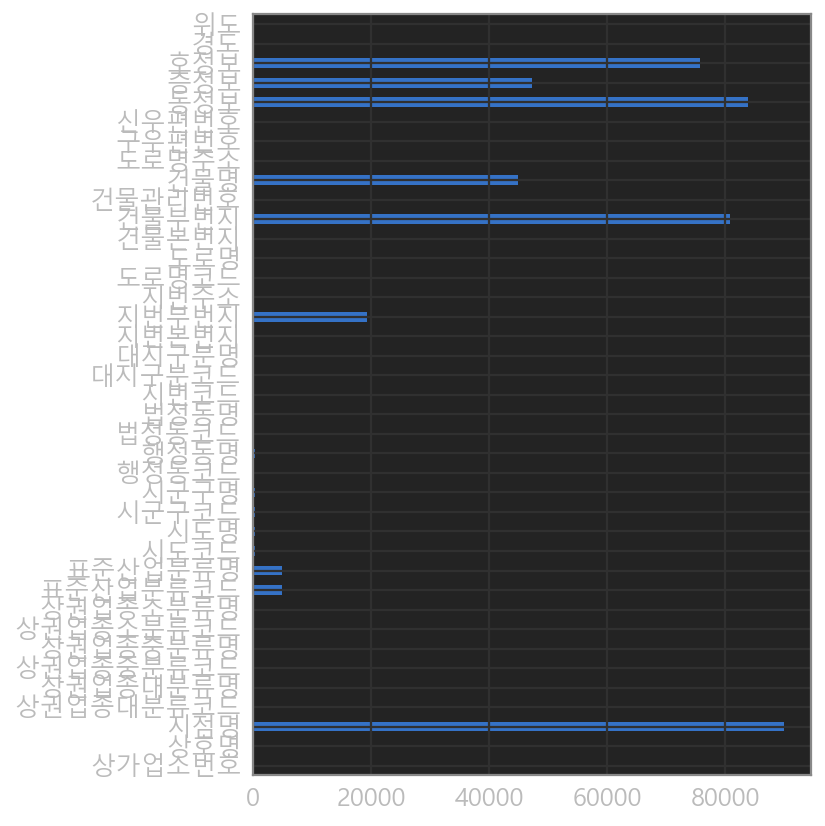

In [12]:
# 위에서 구한 결측치를 .plot.bar를 통해 막대그래프로 표현
null_count.plot.barh(figsize=(5, 7))

In [13]:
# 위에서 계산한 결측치 수를 reset_index를 통해 데이터프레임으로 만들어 줌
df_null_count = null_count.reset_index()
df_null_count.head()

,index,0
0,상가업소번호,0
1,상호명,0
2,지점명,89989
3,상권업종대분류코드,0
4,상권업종대분류명,0


## 컬럼명 변경하기

In [14]:
df_null_count.columns = ["컬럼명", "결측치수"]
df_null_count.head()

,컬럼명,결측치수
0,상가업소번호,0
1,상호명,0
2,지점명,89989
3,상권업종대분류코드,0
4,상권업종대분류명,0


## 정렬하기

In [15]:
# df_null_count 데이터프레임에 있는 결측치수 컬럼을 sort_values를 통해 정렬해서 결측치가 많은 순으로 상위 10개만 출력
df_null_count_top = df_null_count.sort_values(by="결측치수", ascending=False).head(10)
df_null_count_top

,컬럼명,결측치수
2,지점명,89989
34,동정보,83929
28,건물부번지,80731
36,호정보,75784
35,층정보,47291
30,건물명,44882
23,지번부번지,19256
9,표준산업분류코드,4922
10,표준산업분류명,4922
11,시도코드,379


## 특정 컬럼만 불러오기

In [16]:
# 지점명 컬럼을 불러옴
# NaN == Not a Number의 약자로 결측치를 의미
df["지점명"].head()

0    NaN
1    NaN
2    NaN
3    NaN
4    수지점
Name: 지점명, dtype: object

In [17]:
# "컬럼명"이라는 컬럼의 값만 가져와서 drop_columns라는 변수에 담음
drop_columns = df_null_count_top["컬럼명"].tolist()
drop_columns

['지점명',
 '동정보',
 '건물부번지',
 '호정보',
 '층정보',
 '건물명',
 '지번부번지',
 '표준산업분류코드',
 '표준산업분류명',
 '시도코드']

In [18]:
# 해당 컬럼 정보만 데이터프레임에서 가져옴
df[drop_columns].head() # 결측치가 매우 많은 것을 알 수 있음 -> 제거

,지점명,동정보,건물부번지,호정보,층정보,건물명,지번부번지,표준산업분류코드,표준산업분류명,시도코드
0,NaN,NaN,NaN,NaN,NaN,산호한양아파트,NaN,Q86201,일반 의원,41.0
1,NaN,NaN,NaN,NaN,4,NaN,14.0,Q86201,일반 의원,11.0
2,NaN,NaN,NaN,NaN,NaN,한라프라자,1.0,Q86201,일반 의원,41.0
3,NaN,NaN,NaN,NaN,5,NaN,1.0,NaN,NaN,26.0
4,수지점,NaN,NaN,NaN,1,NaN,2.0,G47811,의약품 및 의료용품 소매업,41.0


## 제거하기

In [19]:
print(df.shape) # 제거 전
df = df.drop(drop_columns, axis=1) # column 기준으로 drop (행 기준이면 axis=0)
print(df.shape) # 제거 후

(91335, 39)
(91335, 29)


In [20]:
# 제거 결과를 info로 확인
df.info() # column의 개수와 메모리 용량이 훨씬 줄어들었음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91335 entries, 0 to 91334
Data columns (total 29 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   상가업소번호     91335 non-null  int64  
 1   상호명        91335 non-null  object 
 2   상권업종대분류코드  91335 non-null  object 
 3   상권업종대분류명   91335 non-null  object 
 4   상권업종중분류코드  91335 non-null  object 
 5   상권업종중분류명   91335 non-null  object 
 6   상권업종소분류코드  91335 non-null  object 
 7   상권업종소분류명   91335 non-null  object 
 8   시도명        90956 non-null  object 
 9   시군구코드      90956 non-null  float64
 10  시군구명       90956 non-null  object 
 11  행정동코드      91335 non-null  int64  
 12  행정동명       90956 non-null  object 
 13  법정동코드      91280 non-null  float64
 14  법정동명       91280 non-null  object 
 15  지번코드       91335 non-null  int64  
 16  대지구분코드     91335 non-null  int64  
 17  대지구분명      91335 non-null  object 
 18  지번본번지      91335 non-null  int64  
 19  지번주소       91335 non-null  object 
 20  도로명코드 

## 기초 통계값 보기

   ### 기초 통계 수치

In [21]:
# 평균값
df["위도"].mean()

36.62471119236673

In [22]:
# 중앙값
df["위도"].median()

37.2346523177033

In [23]:
# 최댓값
df["위도"].max()

38.4996585705598

In [24]:
# 최솟값
df["위도"].min()

33.2192896688307

In [25]:
# 갯수
df["위도"].count()

91335

   ### 기초통계값 요약하기-describe

* describe를 사용하면 데이터를 요약할 수 있음. 기본적으로 수치형 데이터를 요약해서 보여줌.
데이터의 갯수, 평균, 표준편차, 최솟값, 1사분위수(25%), 2사분위수(50%), 3사분위수(75%), 최댓값을 볼 수 있음

In [26]:
df["위도"].describe()

count    91335.000000
mean        36.624711
std          1.041361
min         33.219290
25%         35.811830
50%         37.234652
75%         37.507463
max         38.499659
Name: 위도, dtype: float64

In [27]:
# 2개의 컬럼을 describe로 요약
df[["위도", "경도"]].describe() # 2개 이상의 데이터를 가져올 때 리스트 형태의 자료구조를 사용해야 함

,위도,경도
count,91335.000000,91335.000000
mean,36.624711,127.487524
std,1.041361,0.842877
min,33.219290,124.717632
25%,35.811830,126.914297
50%,37.234652,127.084550
75%,37.507463,128.108919
max,38.499659,130.909912


In [28]:
# describe로 '문자열' 데이터 타입의 요약을 봄 (결측치는 제외하고 보여줌)
df.describe(include="object")
# top : 가장 많이 등장한 object
# freq : 빈도수

,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번주소,도로명,건물관리번호,도로명주소
count,91335,91335,91335,91335,91335,91335,91335,90956,90956,90956,91280,91335,91335,91335,91335,91335
unique,56910,1,1,5,5,34,34,17,228,2791,2822,2,53118,16610,54142,54031
top,리원,S,의료,S01,병원,S02A01,약국,경기도,서구,중앙동,중동,대지,서울특별시 동대문구 제기동 965-1,서울특별시 강남구 강남대로,1123010300109650001031604,서울특별시 동대문구 약령중앙로8길 10
freq,152,91335,91335,60774,60774,18964,18964,21374,3165,1856,874,91213,198,326,198,198


 ### 중복제거한 값 보기
 * unique로 중복을 제거한 값을 보고 nunique로 갯수를 세어보기

In [29]:
df["상권업종대분류명"].unique() # 대분류명은 하나라는 것을 알 수 있음

array(['의료'], dtype=object)

In [30]:
df["상권업종대분류명"].nunique()

1

In [31]:
df["상권업종중분류명"].unique()

array(['병원', '약국/한약방', '수의업', '유사의료업', '의료관련서비스업'], dtype=object)

In [32]:
df["상권업종중분류명"].nunique()

5

In [33]:
df["상권업종소분류명"].unique()

array(['산부인과', '내과/외과', '신경외과', '기타병원', '약국', '동물병원', '한약방', '탕제원',
       '정형/성형외과', '소아과', '이비인후과의원', '노인/치매병원', '언어치료', '수의업-종합', '한의원',
       '치과의원', '침구원', '일반병원', '안과의원', '조산원', '한방병원', '종합병원', '유사의료업기타',
       '응급구조대', '혈액원', '치과병원', '척추교정치료', '피부과', '비뇨기과', '치과기공소', '산후조리원',
       '접골원', '수의업-기타', '제대혈'], dtype=object)

In [34]:
df["상권업종소분류명"].nunique()

34

In [35]:
# nunique 대신 len을 사용할 수도 있음
len(df["상권업종소분류명"].unique())

34

 ### 그룹화된 요약값 보기 - value_counts
 * value_counts를 사용하면 카테고리 형태의 데이터 갯수를 세어볼 수 있음

In [36]:
df["시도명"].head()

0      경기도
1    서울특별시
2      경기도
3    부산광역시
4      경기도
Name: 시도명, dtype: object

In [37]:
city = df["시도명"].value_counts()
city

경기도        21374
서울특별시      18943
부산광역시       6473
경상남도        4973
인천광역시       4722
대구광역시       4597
경상북도        4141
전라북도        3894
충청남도        3578
전라남도        3224
광주광역시       3214
대전광역시       3067
충청북도        2677
강원도         2634
울산광역시       1997
제주특별자치도     1095
세종특별자치시      353
Name: 시도명, dtype: int64

In [38]:
# normalize=True 옵션을 사용하면 비율을 구할 수 있음
city_normalize = df["시도명"].value_counts(normalize=True)
city_normalize

경기도        0.234993
서울특별시      0.208266
부산광역시      0.071166
경상남도       0.054675
인천광역시      0.051915
대구광역시      0.050541
경상북도       0.045528
전라북도       0.042812
충청남도       0.039338
전라남도       0.035446
광주광역시      0.035336
대전광역시      0.033720
충청북도       0.029432
강원도        0.028959
울산광역시      0.021956
제주특별자치도    0.012039
세종특별자치시    0.003881
Name: 시도명, dtype: float64

<AxesSubplot:>

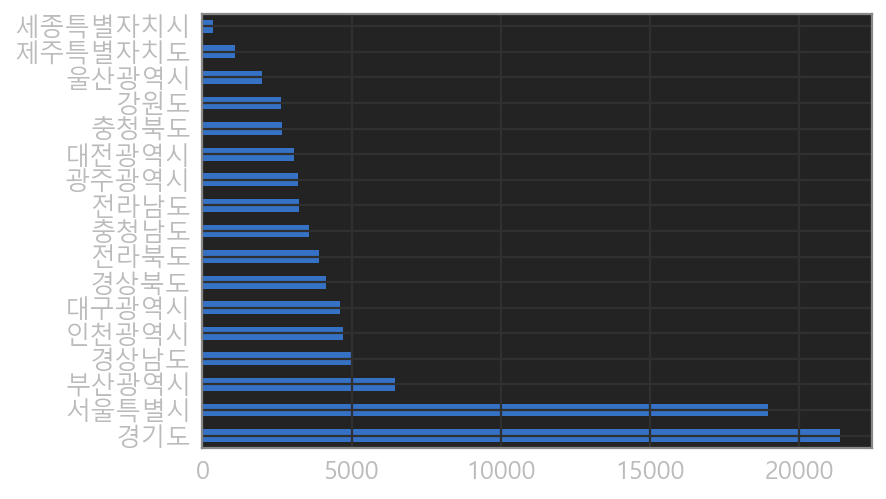

In [39]:
# 위에서 분석한 시도명 수를 막대그래프로 표현
city.plot.barh()

C:\Users\User\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1583: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)


<AxesSubplot:ylabel='시도명'>

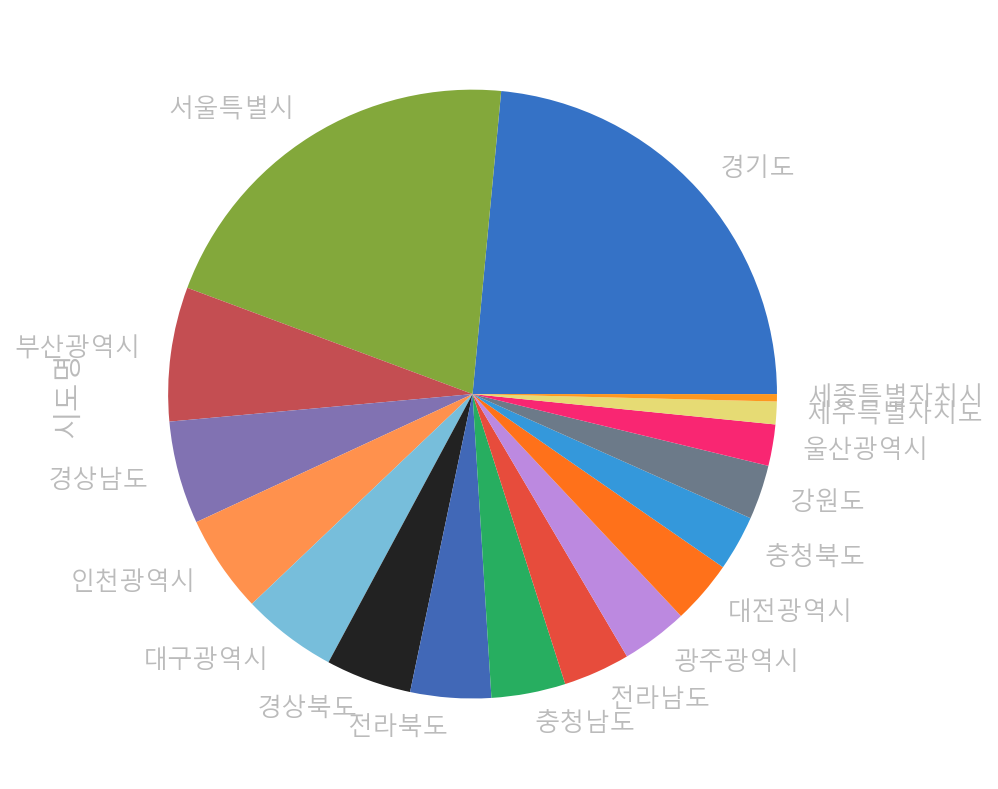

In [40]:
# 파이그래프 그려보기 -> 얼마나 많고 적은지의 차이를 보기 어려움 -> 막대그래프가 적절
city_normalize.plot.pie(figsize = (7, 7))

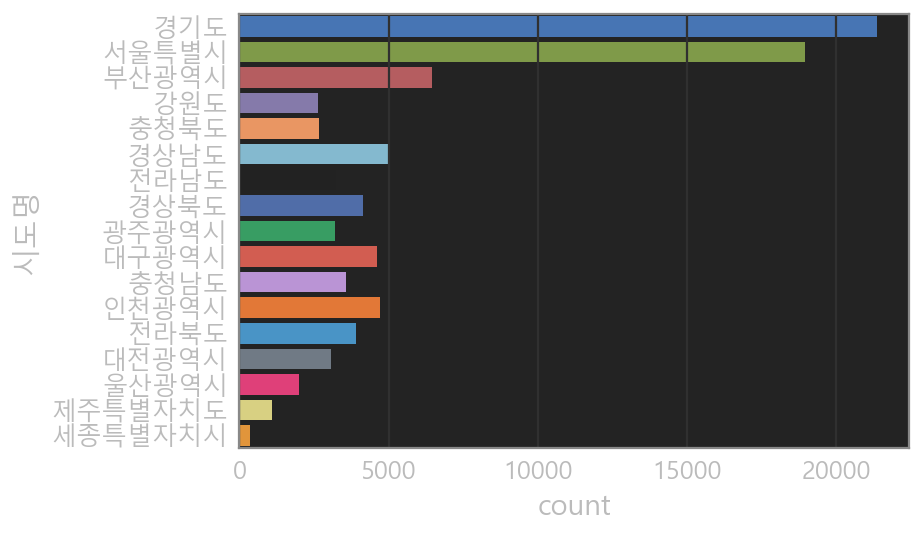

In [41]:
# seaborn의 countplot으로 그려보기
# 데이터프레임 전체를 넣음 (앞에서는 변수에 담아놓은 데이터프레임을 사용했음)
c = sns.countplot(data=df, y="시도명") # 텍스트 출력하기 싫으면 변수명에 담기

In [42]:
df["상권업종대분류명"].value_counts() # 결측치 제거하고 개수

의료    91335
Name: 상권업종대분류명, dtype: int64

In [43]:
c = df["상권업종중분류명"].value_counts()
c

병원          60774
약국/한약방      20923
수의업          5323
유사의료업        3774
의료관련서비스업      541
Name: 상권업종중분류명, dtype: int64

In [44]:
n = df["상권업종중분류명"].value_counts(normalize=True) # 비율 구하기
n

병원          0.665397
약국/한약방      0.229080
수의업         0.058280
유사의료업       0.041320
의료관련서비스업    0.005923
Name: 상권업종중분류명, dtype: float64

<AxesSubplot:>

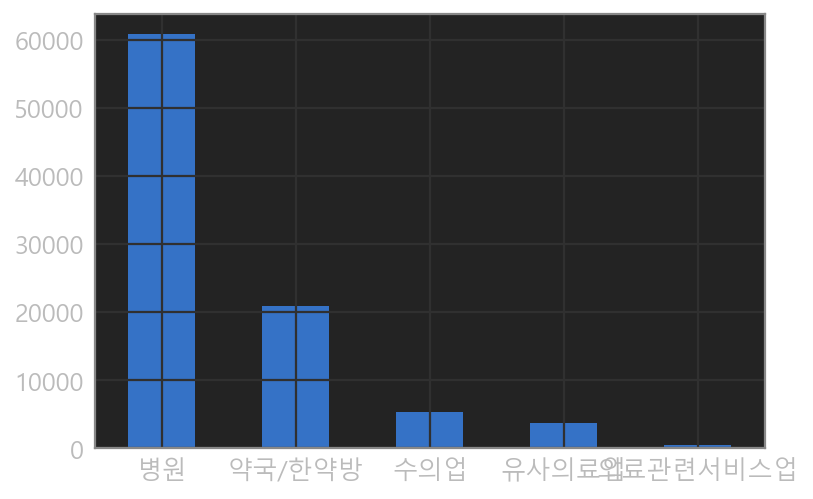

In [45]:
# 판다스의 plot.bar()를 사용해서 막대 그래프 그리기
c.plot.bar(rot=0) # rot : 얼만큼 label값을 회전시킬 것인지 설정

<AxesSubplot:ylabel='상권업종중분류명'>

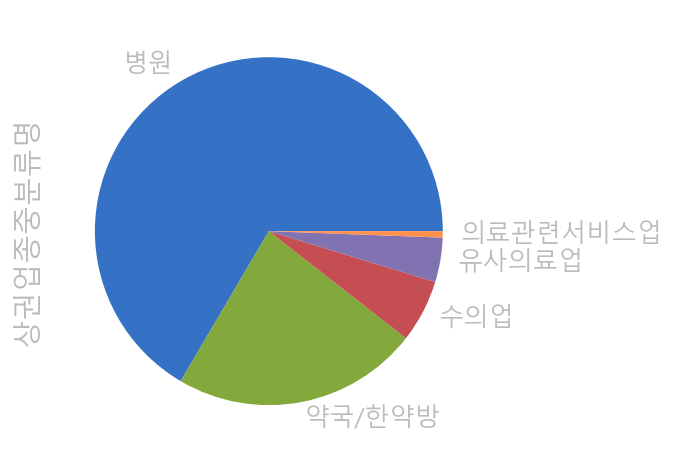

In [46]:
# 판다스의 plot.pie()를 사용해서 파이 그래프 그리기
n.plot.pie()

In [47]:
c = df["상권업종소분류명"].value_counts()
c

약국         18964
치과의원       13731
한의원        13211
내과/외과      11374
기타병원        4922
일반병원        3385
동물병원        3098
정형/성형외과     2562
소아과         2472
수의업-종합      2216
치과기공소       1724
이비인후과의원     1486
한약방         1442
피부과         1273
산부인과        1116
노인/치매병원     1055
안과의원        1042
비뇨기과         809
종합병원         762
치과병원         756
언어치료         664
유사의료업기타      629
탕제원          517
산후조리원        511
신경외과         421
한방병원         397
척추교정치료       338
침구원          154
혈액원          130
응급구조대        125
조산원           30
수의업-기타         9
접골원            9
제대혈            1
Name: 상권업종소분류명, dtype: int64

<AxesSubplot:>

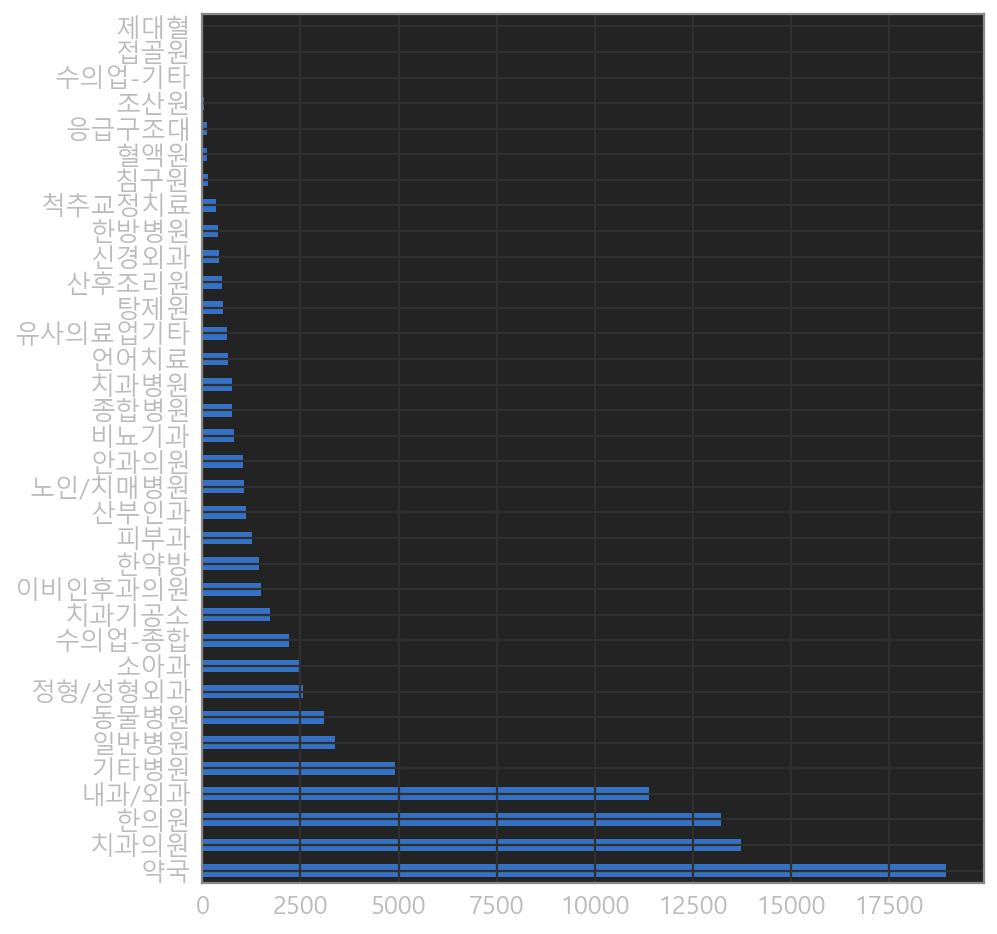

In [48]:
c.plot.barh(figsize=(7, 8), grid=True) # grid : 격자 표현

## 데이터 색인하기
* 특정 데이터만 모아서 따로 보기

In [49]:
# "상권업종중분류명"이 "약국/한약방"인 데이터만 가져와서 df_medical이라는 변수에 담기
df_medical = df[df["상권업종중분류명"] == "약국/한약방"].copy() # 색인값을 다른 목적으로 사용 -> df값 바뀌는 것 방지
df_medical.head(1)

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도명,시군구코드,...,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
4,20364049,더블유스토어수지점,S,의료,S02,약국/한약방,S02A01,약국,경기도,41465.0,...,경기도 용인시 수지구 풍덕천동 712-2,414653205024,경기도 용인시 수지구 문정로,32,4146510100107120002026238,경기도 용인시 수지구 문정로 32,448170.0,16837.0,127.095522,37.323528


In [50]:
# "상권업종대분류명"이 "의료"만 가져옴
# df.loc를 사용하면 행, 열을 함께 가져올 수 있음
# 이 기능을 통해 "상권업종중분류명"만 가져옴
# 가져온 결과를 value_counts 를 통해 중분류의 갯수를 세어봄
m = df["상권업종대분류명"] == "의료"
df.loc[m, "상권업종중분류명"].value_counts()
# df.loc[df["상권업종대분류명"] == "의료", "상권업종중분류명"].value_counts()

병원          60774
약국/한약방      20923
수의업          5323
유사의료업        3774
의료관련서비스업      541
Name: 상권업종중분류명, dtype: int64

In [51]:
# 유사의료업만 따로 모아봄
df_medi = df[df["상권업종중분류명"] == "유사의료업"]
df_medi.shape # 3774개의 데이터가 있음

(3774, 29)

In [52]:
# 상호명을 그룹화해서 갯수를 세어보기
# value_counts를 사용해서 상위 10개를 출력
df["상호명"].value_counts().head(10) # .하면서 메소드를 이어쓰는 것 -> 메소드 체인잉

리원       152
온누리약국    149
경희한의원    141
우리약국     119
중앙약국     111
전자담배      98
조은약국      95
건강약국      87
제일약국      79
사랑약국      73
Name: 상호명, dtype: int64

In [53]:
# 유사의료업만 df_medi 변수에 담겨져 있음
# df_medi 변수에서 상호명으로 갯수 세기, 가장 많은 상호 상위 10개를 출력
df_medi["상호명"].value_counts().head(10)

리원           32
고려수지침        22
대한적십자사       17
헌혈의집         12
수치과기공소       10
고려수지침학회      10
제일치과기공소       9
미소치과기공소       8
대한응급환자이송단     8
아트치과기공소       8
Name: 상호명, dtype: int64

   ### 여러 조건으로 색인하기

In [54]:
# "상권업종소분류명"이 "약국"인 것과 "시도명"이 "서울특별시"인 데이터만 가져옴
# and == &, or == |

df_seoul_drug = df[(df["상권업종소분류명"] == "약국") & (df["시도명"] == "서울특별시")] # 연산자 우선순위로 인해 () 표시
print(df_seoul_drug.shape) # 위에 코드도 출력하고 싶으면 print() 함수 사용
df_seoul_drug.head(1)

(3579, 29)


,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도명,시군구코드,...,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
33,20816709,이즈타워약,S,의료,S02,약국/한약방,S02A01,약국,서울특별시,11680.0,...,서울특별시 강남구 역삼동 821,116803122010,서울특별시 강남구 테헤란로,101,1168010100108210001000001,서울특별시 강남구 테헤란로 101,135080.0,6134.0,127.028023,37.498656


   ### 구별로 보기

In [55]:
# 위에서 색인한 데이터로 "시군구명"으로 그룹화해서 갯수 세기
# 구별로 약국이 몇 개가 있는지 확인
c = df_seoul_drug["시군구명"].value_counts()
c.head()

강남구     374
동대문구    261
광진구     212
서초구     191
송파구     188
Name: 시군구명, dtype: int64

In [56]:
n = df_seoul_drug["시군구명"].value_counts(normalize=True) # 비율 구하기
n.head()

강남구     0.104498
동대문구    0.072925
광진구     0.059234
서초구     0.053367
송파구     0.052529
Name: 시군구명, dtype: float64

<AxesSubplot:>

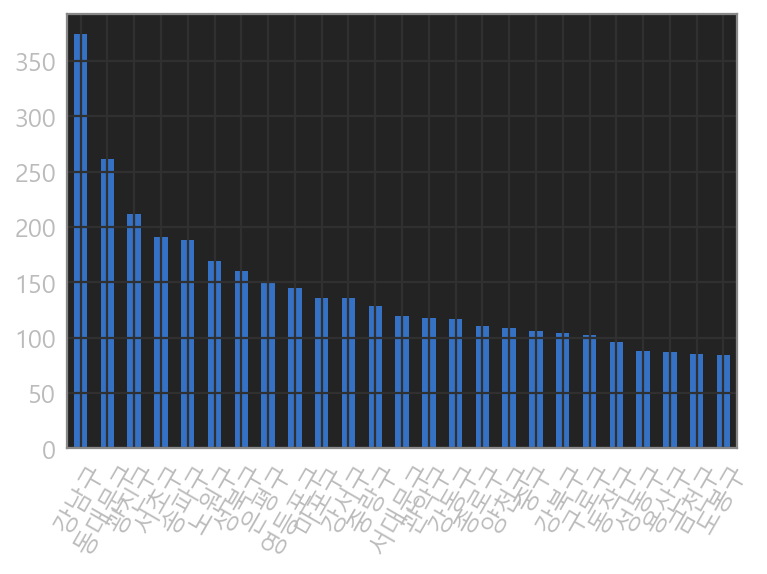

In [57]:
# 막대그래프 그리기
c.plot.bar(rot=60) # 글씨 60도 기울기

In [58]:
# "상권업종소분류명"이 "종합병원"인 것과 "시도명"이 "서울특별시"인 데이터만 가져오기
df_seoul_hospital = df[(df["상권업종소분류명"] == "종합병원") & (df["시도명"] == "서울특별시")].copy() # df에 영향이 가지 않도록 설정
df_seoul_hospital

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도명,시군구코드,...,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
305,25155642,대진의료재단,S,의료,S01,병원,S01B01,종합병원,서울특별시,11215.0,...,서울특별시 광진구 중곡동 58-25,112153104006,서울특별시 광진구 긴고랑로,119,1121510100100580025000733,서울특별시 광진구 긴고랑로 119,143220.0,4944.0,127.088279,37.559048
353,20471487,홍익병원별관,S,의료,S01,병원,S01B01,종합병원,서울특별시,11470.0,...,서울특별시 양천구 신정동 897-13,114702005008,서울특별시 양천구 국회대로,250,1147010100108970013001044,서울특별시 양천구 국회대로 250,158070.0,7937.0,126.862805,37.529213
385,20737057,SNUH,S,의료,S01,병원,S01B01,종합병원,서울특별시,11680.0,...,서울특별시 강남구 역삼동 736-55,116804166727,서울특별시 강남구 테헤란로26길,10,1168010100107360055027688,서울특별시 강남구 테헤란로26길 10,135080.0,6236.0,127.035825,37.499630
1917,23210677,평화드림여의도성모병원의료기매장,S,의료,S01,병원,S01B01,종합병원,서울특별시,11560.0,...,서울특별시 영등포구 여의도동 62,115603118001,서울특별시 영등포구 63로,10,1156011000100620000031477,서울특별시 영등포구 63로 10,150713.0,7345.0,126.936693,37.518296
2461,20024045,한양,S,의료,S01,병원,S01B01,종합병원,서울특별시,11200.0,...,서울특별시 성동구 행당동 15-1,112003103002,서울특별시 성동구 마조로,22,1120010700100150001019623,서울특별시 성동구 마조로 22-2,133070.0,4763.0,127.041325,37.559469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71991,28505952,서울성모병원응급의료센터,S,의료,S01,병원,S01B01,종합병원,서울특별시,11650.0,...,서울특별시 서초구 반포동 505,116502121003,서울특별시 서초구 반포대로,222,1165010700101230000017226,서울특별시 서초구 반포대로 222,137701.0,6591.0,127.005841,37.502382
76508,12292992,라마르의원,S,의료,S01,병원,S01B01,종합병원,서울특별시,11740.0,...,서울특별시 강동구 천호동 453-8,117404172367,서울특별시 강동구 천호대로157길,18,1174010900104530021010314,서울특별시 강동구 천호대로157길 18,134864.0,5335.0,127.127466,37.538485
90492,16031909,가톨릭대학교여의도성모병원,S,의료,S01,병원,S01B01,종합병원,서울특별시,11140.0,...,서울특별시 중구 명동2가 1-1,111404103165,서울특별시 중구 명동길,74,1114012700100010001019574,서울특별시 중구 명동길 74,100809.0,4537.0,126.986758,37.563662
90581,16332576,씨엠병원,S,의료,S01,병원,S01B01,종합병원,서울특별시,11560.0,...,서울특별시 영등포구 영등포동4가 90,115604154717,서울특별시 영등포구 영등포로36길,13,1156010500100900000035097,서울특별시 영등포구 영등포로36길 13,150030.0,7301.0,126.903857,37.518807


In [59]:
# "시군구명"으로 그룹화해서 구별로 종합병원의 수를 세어보기
df_seoul_hospital["시군구명"].value_counts()

강남구     15
영등포구     8
서초구      6
광진구      6
중구       5
송파구      5
강동구      5
강북구      4
양천구      4
도봉구      4
서대문구     4
성북구      3
동대문구     2
노원구      2
관악구      2
종로구      2
금천구      2
구로구      2
강서구      2
중랑구      2
성동구      2
마포구      1
동작구      1
용산구      1
은평구      1
Name: 시군구명, dtype: int64

   ### 텍스트 데이터 색인하기

In [60]:
# 색인하기 전에 상호명 중에 종합병원이 아닌 데이터 찾기
df_seoul_hospital.loc[~df_seoul_hospital["상호명"].str.contains("종합병원"), "상호명"].unique() # ~ 표시

array(['대진의료재단', '홍익병원별관', 'SNUH', '평화드림여의도성모병원의료기매장', '한양', '백산의료재단친구병원',
       '서울보훈병원', '서울성모병원장례식장꽃배달', '서울대학교병원', '알콜중독및정신질환상담소',
       '강남성모병원장례식장꽃배달', '제일병원', '이랜드클리닉', '사랑나눔의료재단', '우울증센터', '성심의료재단',
       '다나의료재단', '서울아산병원신관', '원자력병원장례식장', '국민의원', '고려대학교구로병원', '학교법인일송학원',
       '삼성의료원장례식장', '희명스포츠의학센터인공신장실', '연세대학교의과대학강남세브란스', '국립정신병원',
       '코아클리닉', '수서제일의원', '사랑의의원', '한국전력공사부속한일병원', '신촌연세병원', '창동제일의원',
       '영동세브란스병원', '제일성심의원', '삼성의료재단강북삼성태', '서울시립보라매병원', '서울이의원',
       '서울대학교병원비상계획외래', '평화드림서울성모병원의료', '홍익병원', '사랑나눔의료재단서', '독일의원',
       '서울연합의원', '우신향병원', '동부제일병원', '아산재단금강병원', '명곡안연구소', '아산재단서울중앙병원',
       '메디힐특수여객', '삼성생명공익재단삼성서', '성광의료재단차병원', '한국건강관리협회서울특',
       '정해복지부설한신메디피아', '성베드로병원', '성애의료재단', '실로암의원', 'Y&T성모마취과', '광진성모의원',
       '서울현대의원', '이노신경과의원', '송정훼밀리의원', '서울중앙의원', '영남의료재단', '인제대학교서울백병원',
       '한국필의료재단', '세브란스의원', '가톨릭대학교성바오로병원장례식장', '서울연세의원', '사랑의병원',
       '성삼의료재단미즈메디병원', '씨엠충무병원', '성신의원', '원진재단부설녹색병원', '송파제일의원',
       '카톨릭성모의원', '한양성심의원', '관악

In [61]:
# 상호명에서 특정단어가 들어가는 데이터만 가져오기 - 꽃배달
df_seoul_hospital[df_seoul_hospital["상호명"].str.contains("꽃배달")]

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도명,시군구코드,...,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
2803,20895655,서울성모병원장례식장꽃배달,S,의료,S01,병원,S01B01,종합병원,서울특별시,11650.0,...,서울특별시 서초구 반포동 551,116504163330,서울특별시 서초구 사평대로28길,55,1165010700105510000017194,서울특별시 서초구 사평대로28길 55,137040.0,6578.0,127.000682,37.498257
4644,22020310,강남성모병원장례식장꽃배달,S,의료,S01,병원,S01B01,종합병원,서울특별시,11650.0,...,서울특별시 서초구 반포동 547-6,116504163242,서울특별시 서초구 반포대로39길,56,1165010700105470006016762,서울특별시 서초구 반포대로39길 56-24,137040.0,6578.0,127.001756,37.499095


In [62]:
# 상호명에서 특정단어가 들어가는 데이터만 가져오기 - 의료기
df_seoul_hospital[df_seoul_hospital["상호명"].str.contains("의료기")]

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도명,시군구코드,...,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
1917,23210677,평화드림여의도성모병원의료기매장,S,의료,S01,병원,S01B01,종합병원,서울특별시,11560.0,...,서울특별시 영등포구 여의도동 62,115603118001,서울특별시 영등포구 63로,10,1156011000100620000031477,서울특별시 영등포구 63로 10,150713.0,7345.0,126.936693,37.518296


In [63]:
# "꽃배달|의료기|장례식장|상담소|어린이집"은 종합병원과 무관하기 때문에
# 전처리를 위해 해당 텍스트를 한 번에 검색
# 제거할 데이터의 인덱스만 drop_row에 담아주고 list 형태로 변환
drop_row = df_seoul_hospital[df_seoul_hospital["상호명"].str.contains("꽃배달|의료기|장례식장|상담소|어린이집")].index
drop_row = drop_row.tolist()
drop_row

[1917, 2803, 4431, 4644, 7938, 10283, 47008, 60645, 70177]

In [64]:
# 의원으로 끝나는 데이터도 종합병원으로 볼 수 없기 때문에 인덱스를 찾아서
# drop_row2에 담아주고 list 형태로 변환
drop_row2 = df_seoul_hospital[df_seoul_hospital["상호명"].str.endswith("의원")].index
drop_row2 = drop_row2.tolist()
drop_row2

[8479,
 12854,
 13715,
 14966,
 16091,
 18047,
 20200,
 20415,
 30706,
 32889,
 34459,
 34720,
 35696,
 37251,
 45120,
 49626,
 51575,
 55133,
 56320,
 56404,
 56688,
 57551,
 62113,
 76508]

In [65]:
# .삭제할 행을 drow_row에 합쳐줌
drop_row = drop_row + drop_row2
len(drop_row)

33

In [66]:
# 해당 셀을 삭제하고 삭제 전과 후의 행의 갯수를 비교
print(df_seoul_hospital.shape)
df_seoul_hospital = df_seoul_hospital.drop(drop_row, axis = 0) # 행을 기준으로 삭제
print(df_seoul_hospital.shape)

(91, 29)
(58, 29)


<AxesSubplot:>

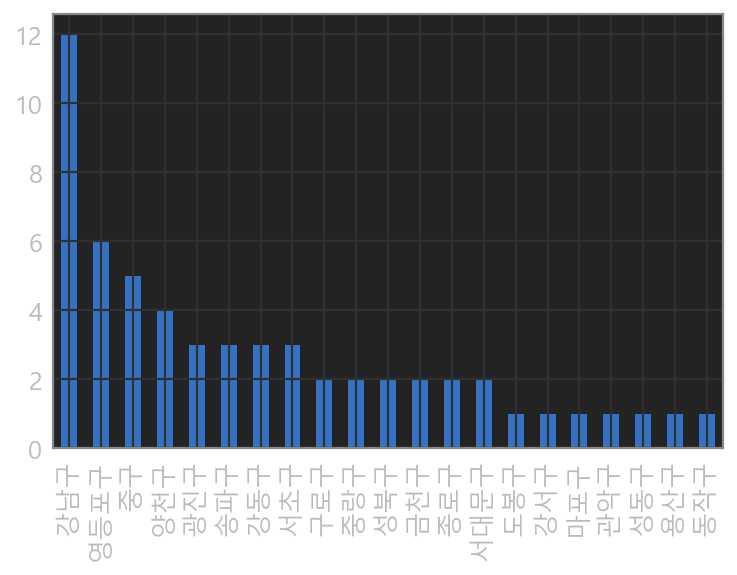

In [67]:
# 시군구명에 따라 종합병원의 숫자를 countplot으로 그리기
df_seoul_hospital["시군구명"].value_counts().plot.bar()

<AxesSubplot:xlabel='시군구명', ylabel='count'>

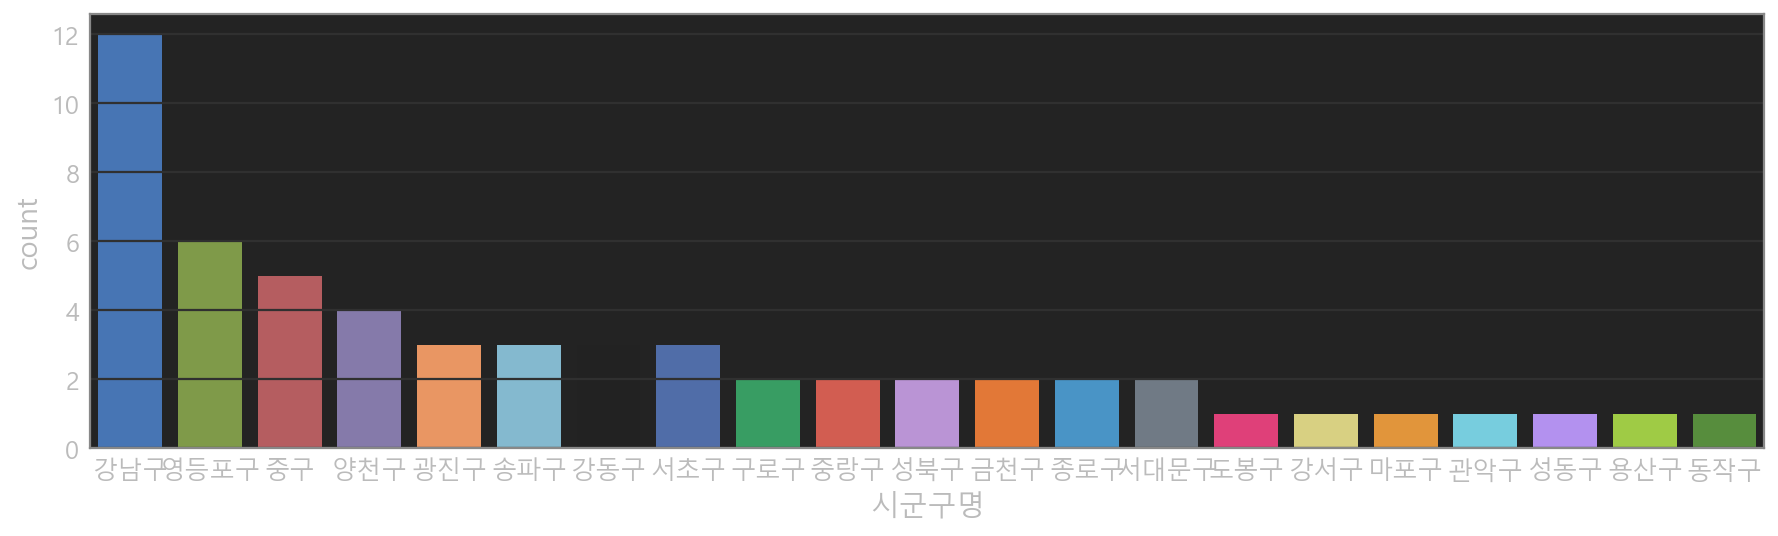

In [68]:
plt.figure(figsize=(15, 4))
# index만 뽑아와서 큰 순서로 정렬
sns.countplot(data=df_seoul_hospital, x="시군구명", order=df_seoul_hospital["시군구명"].value_counts().index)

In [69]:
df_seoul_hospital["상호명"].unique() # 다시 확인

array(['대진의료재단', '홍익병원별관', 'SNUH', '한양', '백산의료재단친구병원', '서울보훈병원',
       '서울대학교병원', '제일병원', '이랜드클리닉', '사랑나눔의료재단', '우울증센터', '성심의료재단',
       '다나의료재단', '서울아산병원신관', '고려대학교구로병원', '학교법인일송학원', '희명스포츠의학센터인공신장실',
       '연세대학교의과대학강남세브란스', '국립정신병원', '코아클리닉', '한국전력공사부속한일병원', '신촌연세병원',
       '영동세브란스병원', '삼성의료재단강북삼성태', '서울시립보라매병원', '서울대학교병원비상계획외래',
       '평화드림서울성모병원의료', '홍익병원', '사랑나눔의료재단서', '우신향병원', '동부제일병원', '아산재단금강병원',
       '명곡안연구소', '아산재단서울중앙병원', '메디힐특수여객', '삼성생명공익재단삼성서', '성광의료재단차병원',
       '한국건강관리협회서울특', '정해복지부설한신메디피아', '성베드로병원', '성애의료재단', 'Y&T성모마취과',
       '영남의료재단', '인제대학교서울백병원', '한국필의료재단', '사랑의병원', '성삼의료재단미즈메디병원',
       '씨엠충무병원', '원진재단부설녹색병원', '강남센트럴병원', '우리들병원', '건국대학교병원', '서울적십자병원',
       '서울성모병원응급의료센터', '가톨릭대학교여의도성모병원', '씨엠병원'], dtype=object)

   ### 특정 지역만 보기

In [70]:
# 서울에 있는 데이터의 위도와 경도를 보기
df_seoul = df[df["시도명"] == "서울특별시"].copy() # 새로운 변수에 데이터프레임을 저장시 copy() 사용
df_seoul.shape

(18943, 29)

<AxesSubplot:>

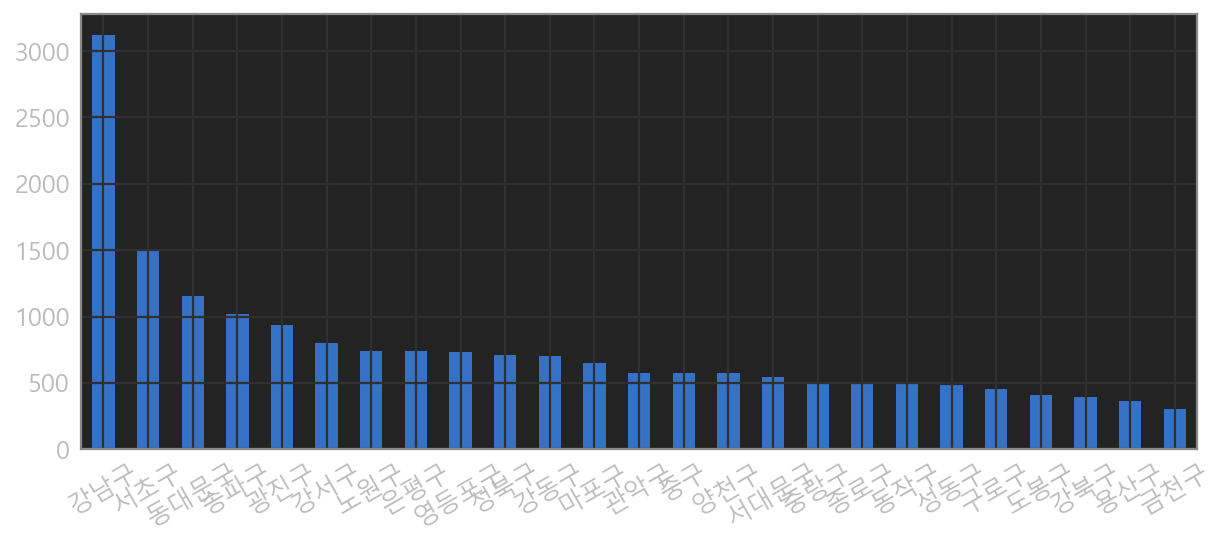

In [71]:
# seaborn의 countplot을 사용해서 위에서 만든 df_seoul 데이터프레임의 시군구명을 시각화하기
df_seoul["시군구명"].value_counts().plot.bar(figsize=(10, 4), rot=30)

<AxesSubplot:xlabel='시군구명', ylabel='count'>

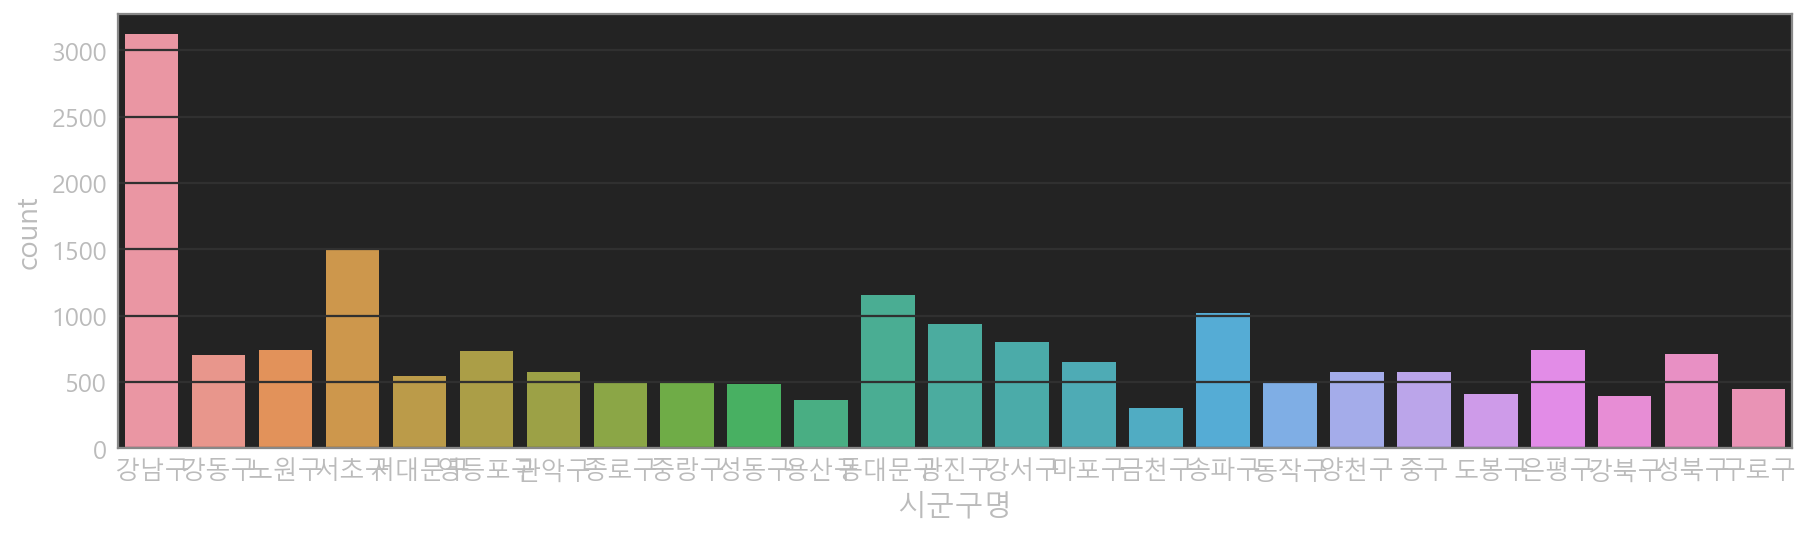

In [72]:
# 시군구명을 seaborn의 countplot으로 그리기
plt.figure(figsize=(15, 4))
sns.countplot(data=df_seoul, x="시군구명")

<AxesSubplot:xlabel='경도', ylabel='위도'>

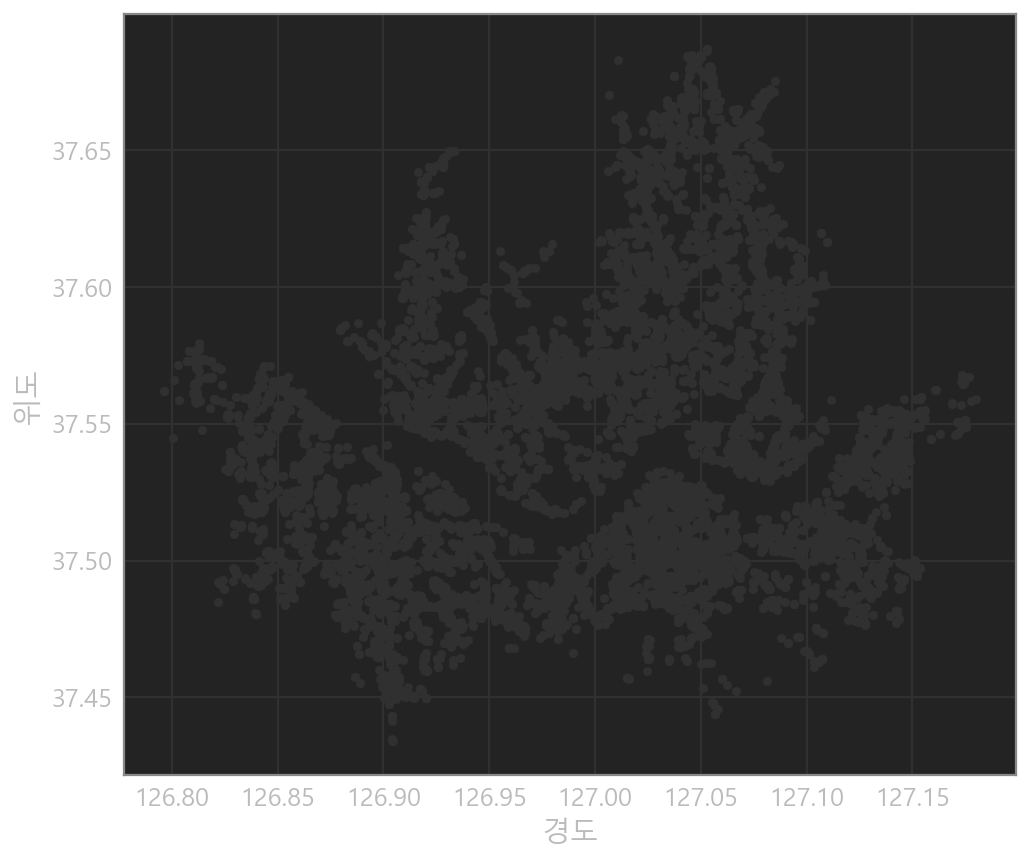

In [73]:
# Pandas의 plot.scatter 를 통해 경도와 위도를 표시
df_seoul[["경도", "위도", "시군구명"]].plot.scatter(x="경도", y="위도", figsize=(8, 7), grid=True) # 격자표시

In [ ]:
# seaborn의 scatterplot 을 통해 구별 경도와 위도를 표시
plt.figure(figsize=(9, 8))
sns.scatterplot(data=df_seoul, x="경도", y="위도", hue="시군구명") # hue : 색상 의미 -> 시군구별로 색상이 다르게 나타남

<AxesSubplot:xlabel='경도', ylabel='위도'>

<AxesSubplot:xlabel='경도', ylabel='위도'>

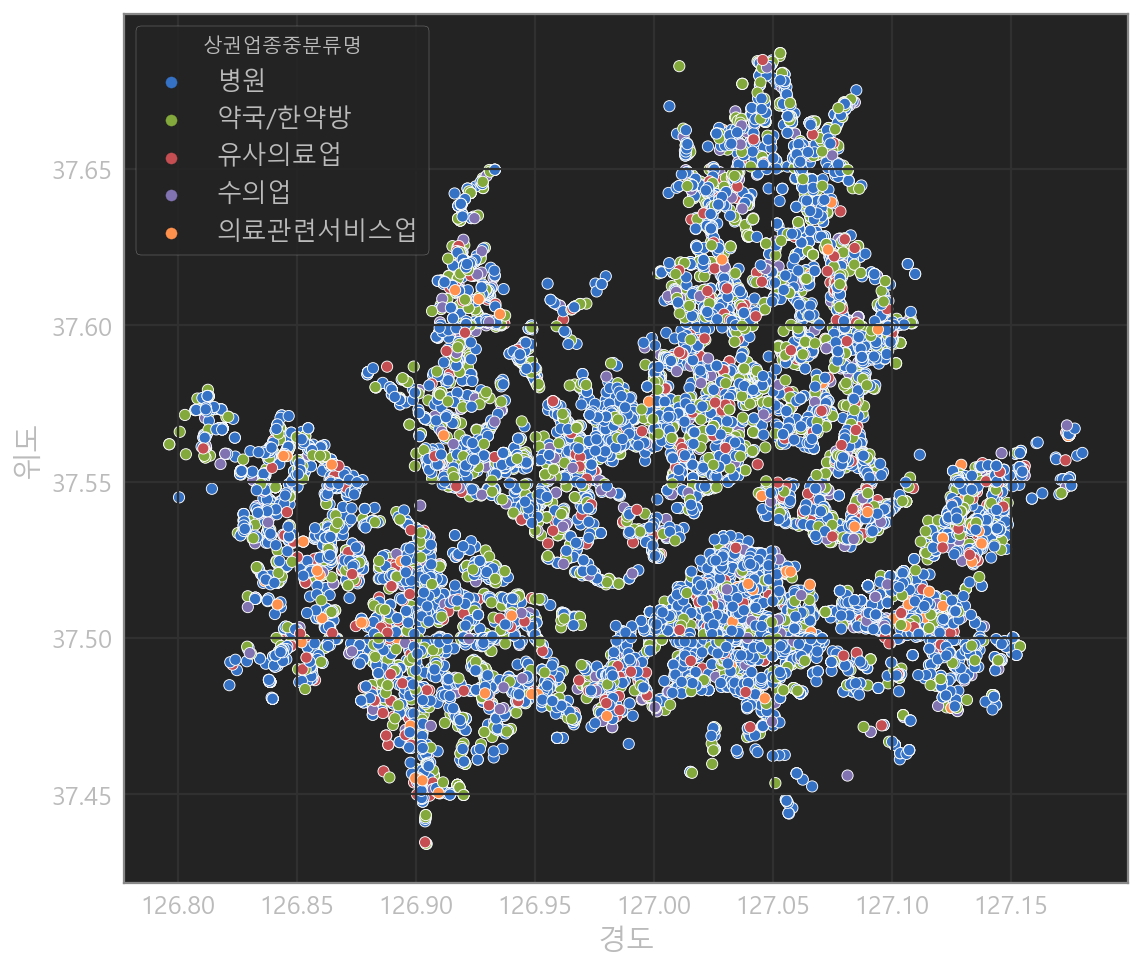

In [75]:
# seaborn의 scatterplot 을 통해 "상권업종중분류명" 경도와 위도를 표시
plt.figure(figsize=(9, 8))
sns.scatterplot(data=df_seoul, x="경도", y="위도", hue="상권업종중분류명")

<AxesSubplot:xlabel='경도', ylabel='위도'>

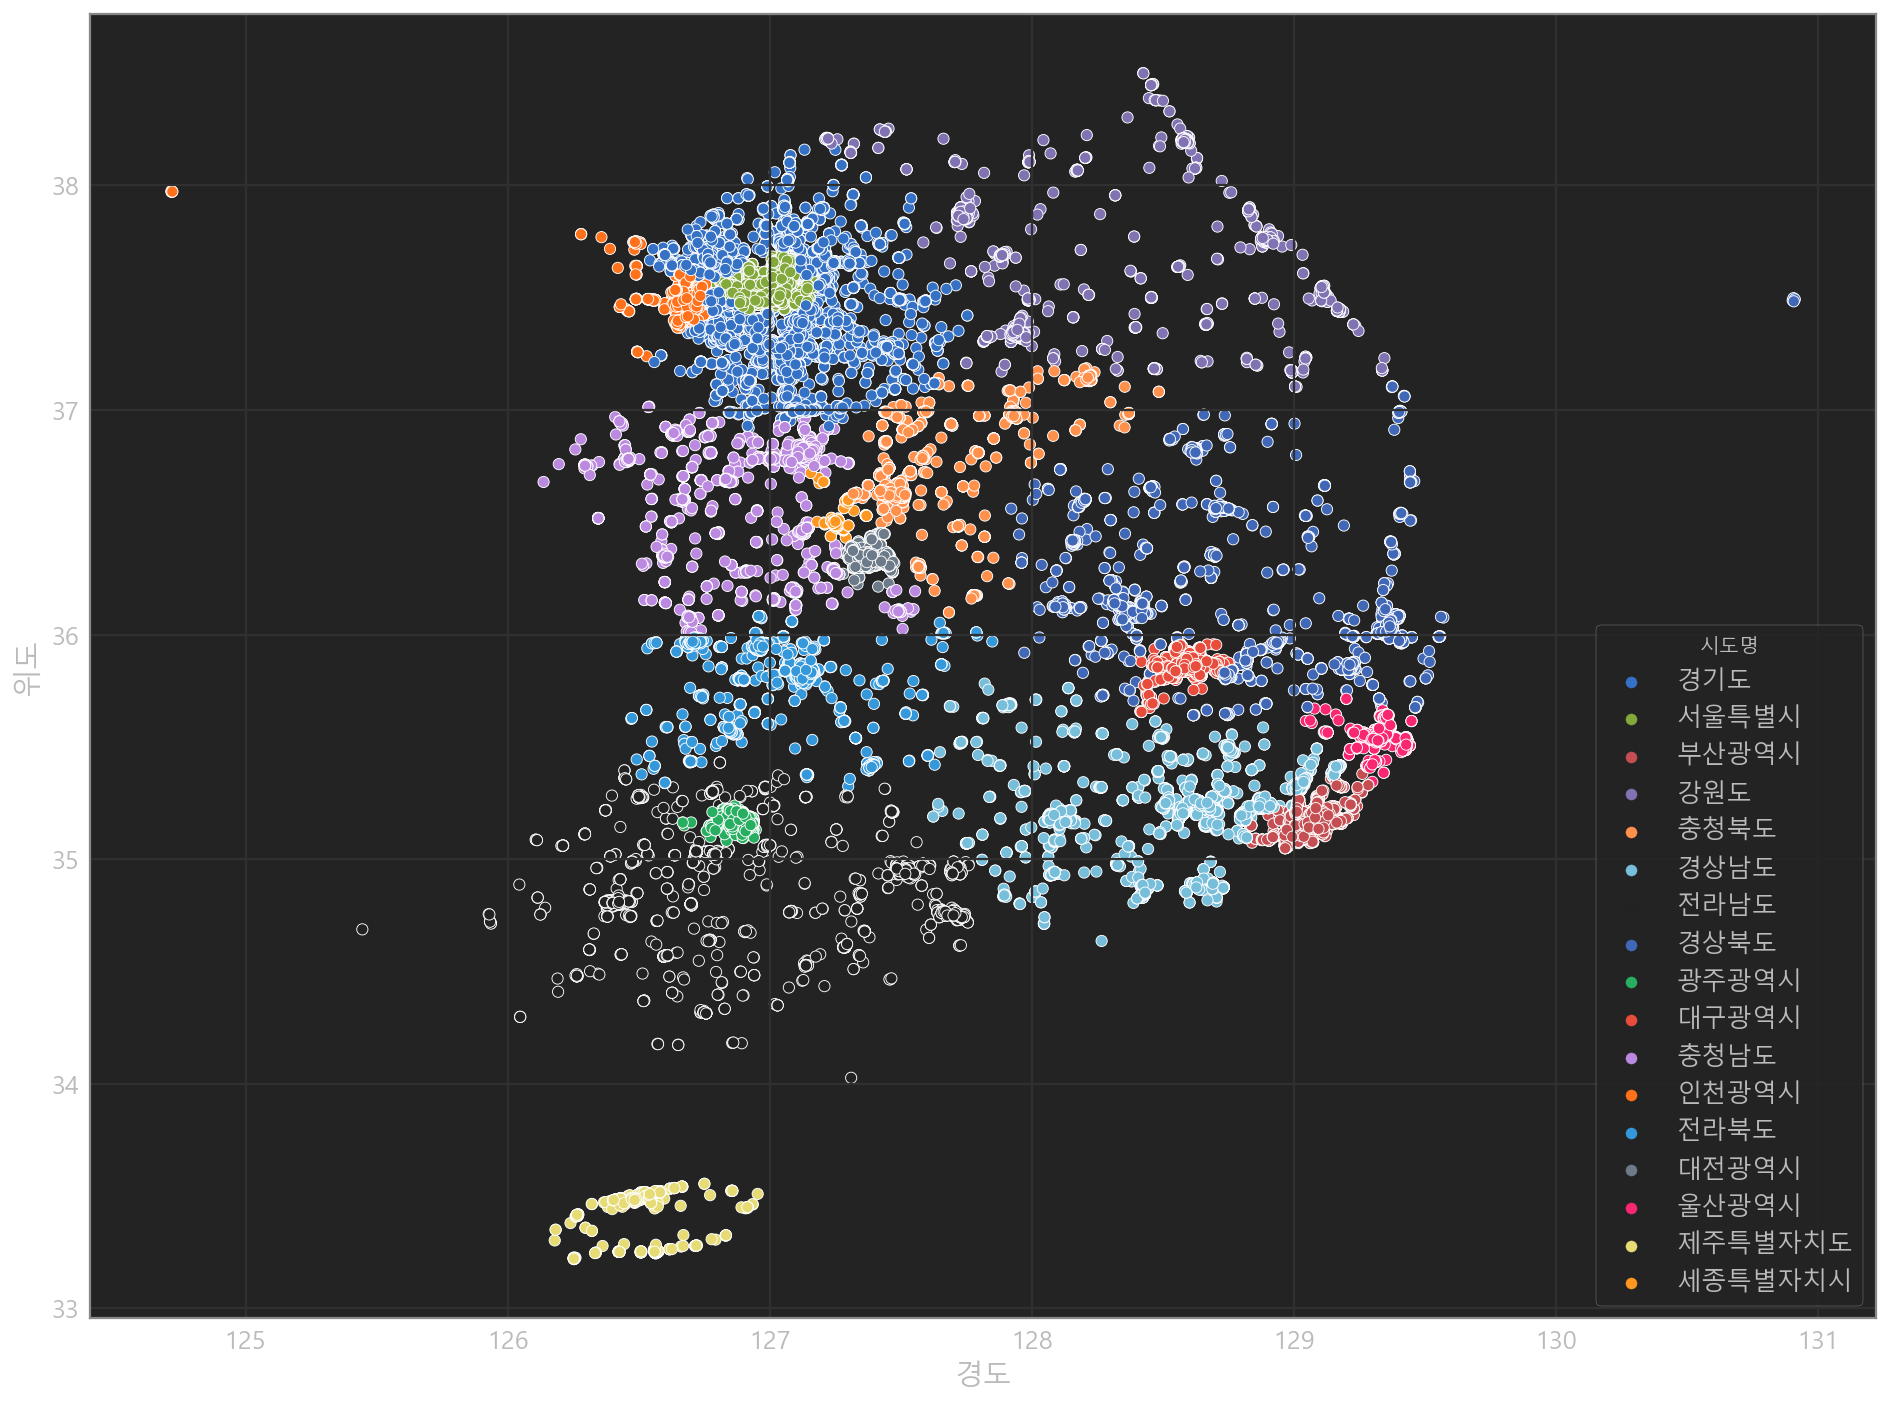

In [76]:
# seaborn의 scatterplot을 통해 전국 데이터(df)로 구별 경도와 위도를 표시
plt.figure(figsize=(16, 12))
sns.scatterplot(data=df, x="경도", y="위도", hue="시도명")

## Folium으로 지도 활용하기
   * conda 명령어로 설치 : conda install -c conda-forge folium

In [77]:
# 지도 시각화를 위한 라이브러리
import folium

In [78]:
# 지도의 중심을 지정하기 위해 위도와 경도의 평균 구하기
df_seoul_hospital["위도"].mean()
df_seoul_hospital["경도"].mean()

126.9963589356625

In [79]:
df_seoul_hospital.head(1)

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도명,시군구코드,...,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
305,25155642,대진의료재단,S,의료,S01,병원,S01B01,종합병원,서울특별시,11215.0,...,서울특별시 광진구 중곡동 58-25,112153104006,서울특별시 광진구 긴고랑로,119,1121510100100580025000733,서울특별시 광진구 긴고랑로 119,143220.0,4944.0,127.088279,37.559048


In [84]:
map = folium.Map(location=[df_seoul_hospital["위도"].mean(), df_seoul_hospital["경도"].mean()], 
           zoom_start=12) # 서울 지도가 자세히 보이도록 설정

for n in df_seoul_hospital.index: # 행에 해당되는 데이터를 모두 가져옴
    name = df_seoul_hospital.loc[n, "상호명"]
    address = df_seoul_hospital.loc[n, "도로명주소"]
    popup = f"{name}-{address}" # 상호명-도로명주소 연결
    location = [df_seoul_hospital.loc[n, "위도"], df_seoul_hospital.loc[n, "경도"]]
    folium.Marker(
        location = location,
        popup = popup,
    ).add_to(map)
map

## 자율주제를 세우고 직접 분석
* 상권업종중분류명, 상권업종소분류명 중에 관심 있는 분류명을 색인 후에 시도별, 시군구별 분석 해보기
* 예시)
    * 언어치료는 시군구별로 어디에 많이 위치할까?
    * 의료시설은 서울과 강남에 집중되어 있을까?
    * 강남에는 피부과, 성형외과과 다른 지역에 비해 많을까?